In [1]:
import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns

**STORYTELLING**

PREPARACIÓN DE LOS DATOS

In [2]:
df=pd.read_csv('Exams/Expanded_data_with_more_features.csv', sep=',', decimal='.', index_col=0)
df.head(5) # muestreo de los primeros 5 registros para ver la estructura de los datos, para ver si se importaron correctamente

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [3]:
df["Score"]=((df["MathScore"]+df["ReadingScore"]+df["WritingScore"])/3).round(0)
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Score
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74,72.0
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88,82.0
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,90.0
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42,48.0
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,76.0


Se agrega la columna score que es el promedio de los 3 exámenes.

In [4]:
## ver todas las modas de las columnas del dfset de los examenes de los chicos

moda=df.mode().iloc[0]
print("Moda: ", moda)

Moda:  Gender                       female
EthnicGroup                 group C
ParentEduc             some college
LunchType                  standard
TestPrep                       none
ParentMaritalStatus         married
PracticeSport             sometimes
IsFirstChild                    yes
NrSiblings                      1.0
TransportMeans           school_bus
WklyStudyHours               5 - 10
MathScore                        64
ReadingScore                     65
WritingScore                     67
Score                          68.0
Name: 0, dtype: object


In [5]:
## reemplazo el resto de las columnas nulas por su moda (valor mas frecuente). es elegido porque es un modelo de clasificacion o categorizacion

df.fillna(moda, inplace=True) ## implace para que se guarde en el dfframe

**INTRODUCCIÓN**

Este estudio de los examenes de los alumunos , en la misma se tomaron se midieron los score en las asignaturas de matematicas , escritura y lectura. el objetivo del mismo es como 
incide la actividad fisica , nivel de educacion de los padres, las horas de estudio, cantidad de hermandos , etc en el score de los alumnos. a continuacion a analizamos los principales 
resultado por cada categoria. 
Nuestro objetivo principal es determinar como la actividad fisica incide en el score de los alumnos, independientemente de las demas variables.

**PREGUNTA ÚTILES PARA ENTENDER LOS RESULTADOS**

Score de examenes en matematicas, lectura y escritura  por genero , nivel de educacion de los padres , por practica de deportes , cantidsad de estudio , etc.

1. ¿cuales son los Promedios de cada uno de los exámenes? 
2. ¿El genero influye en el promedio de los exámenes? y ¿cuales la cantidad de hombres y mujeres?
3. ¿incide el nivel de educacion de los padres en el promedio de los exámenes?
4. ¿como incide la cantidad de horas de estudio en los scores de los exámenes?
5. ¿incide la practica de deportes en el promedio de los examenes? -- **pregunta objetivo del proyecto**
   conclusion del estudio

1. **PROMEDIOS DE CADA UNO DE LOS EXÁMENES**

Vamos a ver como salieron los promedios totales de cada uno de las asignaturas que se tomo el estudio.

In [6]:
df.describe()

,NrSiblings,MathScore,ReadingScore,WritingScore,Score
count,30641.000000,30641.000000,30641.000000,30641.000000,30641.000000
mean,2.087106,66.558402,69.377533,68.418622,68.116739
std,1.442665,15.361616,14.758952,15.443525,14.456619
min,0.000000,0.000000,10.000000,4.000000,9.000000
25%,1.000000,56.000000,59.000000,58.000000,58.000000
50%,2.000000,67.000000,70.000000,69.000000,68.000000
75%,3.000000,78.000000,80.000000,79.000000,79.000000
max,7.000000,100.000000,100.000000,100.000000,100.000000


<Axes: xlabel='variable', ylabel='value'>

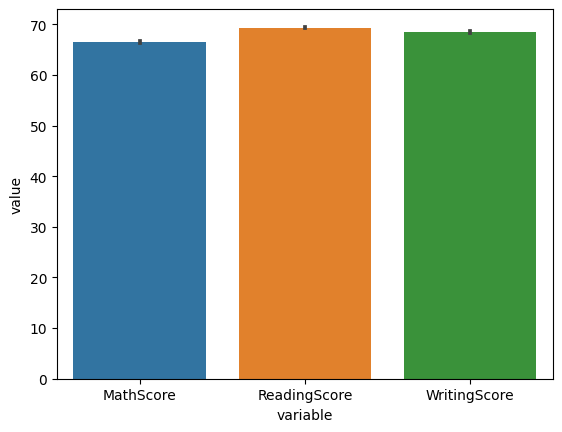

In [7]:
data=pd.DataFrame(df,columns=["MathScore","ReadingScore","WritingScore"])
data1=unpivoted = data.melt()
sns.barplot(x="variable", y="value", data=data1)

2. **PROMEDIOS DE LOS EXÁMENES POR GÉNERO** (FEMENINO Y MASCULINO)

Aca vamos a ver como se comportan los promedios de los examenes por genero. y se puede ver diferencias sobre todo en el examen de matematicas, donde los hombres tienen un mayor 
promedios que las mujeres, en lectura y escritura las mujeres tienen un mayor promedio que los hombres.


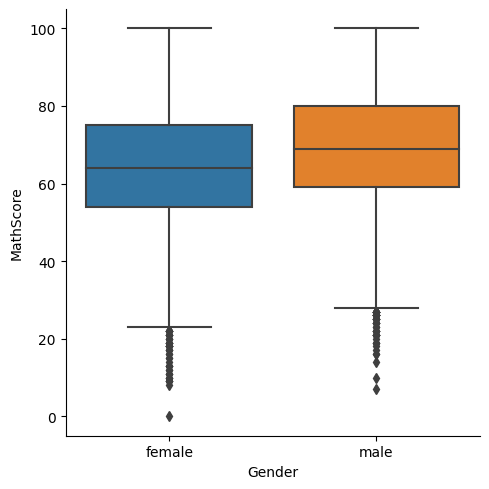

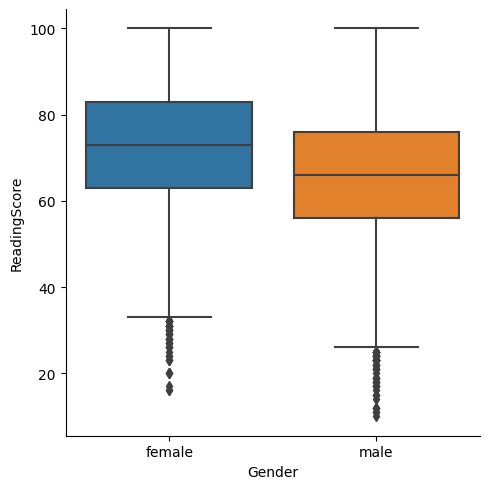

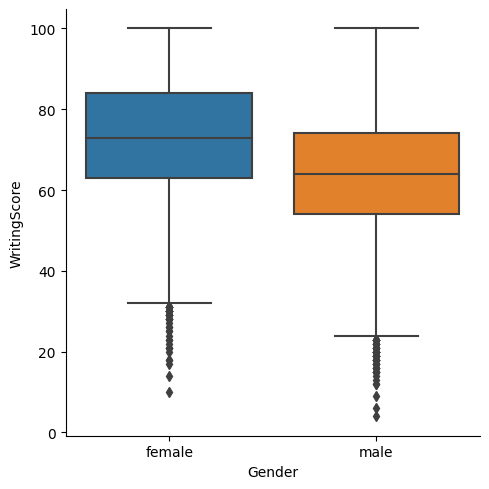

In [8]:
sns.catplot(x="Gender", y="MathScore", data=df, kind="box")
sns.catplot(x="Gender", y="ReadingScore", data=df, kind="box")
sns.catplot(x="Gender", y="WritingScore", data=df, kind="box")

In [9]:
cuadro1=pd.DataFrame(data=df,columns=["Gender","Score"])
cuadro2=cuadro1.groupby("Gender").mean()
cuadro2

,Score
Gender,
female,69.928683
male,66.280147


EL Score representa el promedio de los tres examenes que realizaron los alumnos. En mismo se  Observa que las mujeres tienen un promedio general de los 3 examenes mayor a los hombres 
un 5.5% mayor. 

En tota de los alumnos que participaron en este estudio , 30641 estudiantes de los cuales las mujeres representan un 50.4% y los hombres un 49.6% del total de los alumnos. es decir 
parejo la cantidad de hombres y mujeres.

Gender
female    15424
male      15217
dtype: int64


<Axes: xlabel='Gender'>

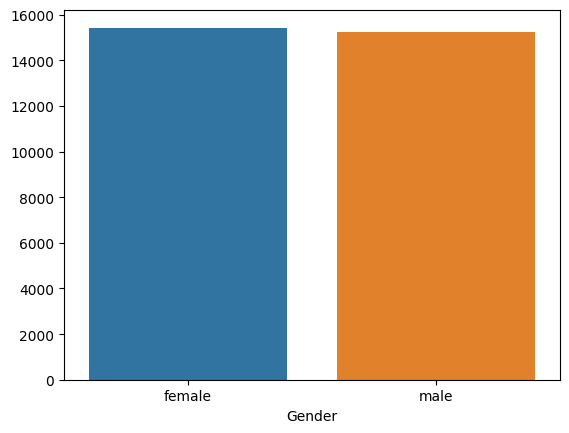

In [10]:
cantidad=df.groupby("Gender").size()
print(cantidad)
sns.barplot(x=cantidad.index, y=cantidad.values)

3. **PROMEDIOS DE LOS EXÁMENES, SEGÚN EL NIVEL DE EDUCACIÓN DE LOS PADRES** 
¿incide en el promedio de los examenes?

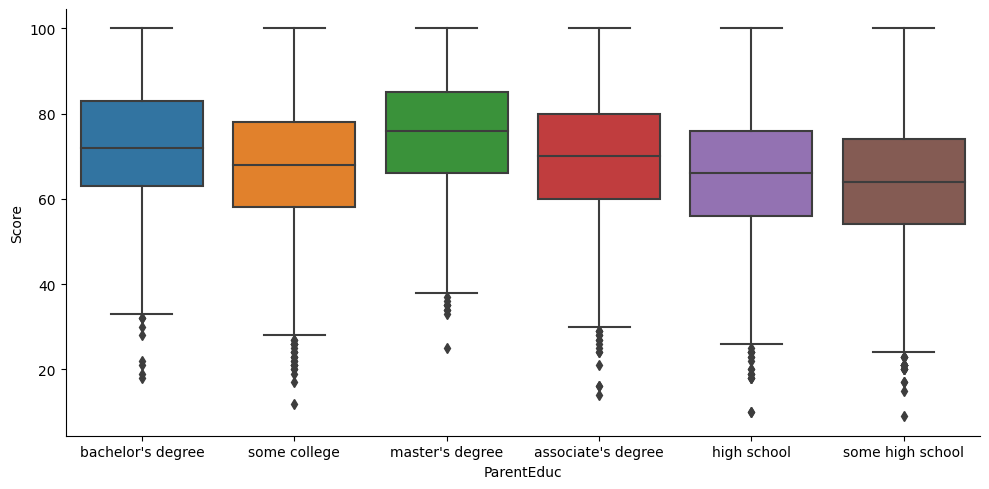

In [11]:
sns.catplot(data=df,x="ParentEduc",y="Score",kind="box",aspect=2)

Aca esta los principales score por nivel de educacion de los padres , se observa que los alumnos que tienen padres con un nivel de educacion de bachillerato y superior tienen mejores 
resultados en los examenes que los alumnos que tienen padres con un nivel de educacion de secundaria y primaria.

4. **CANTIDAD DE HORAS DE ESTUDIO DE LOS ALUMNOS**

la cantidad de los horas de alumnmos estudian incide en los scores de los examenes? 

esta pregunta apriori se puede pensar que si , pero vamos a ver que nos dice los datos. 

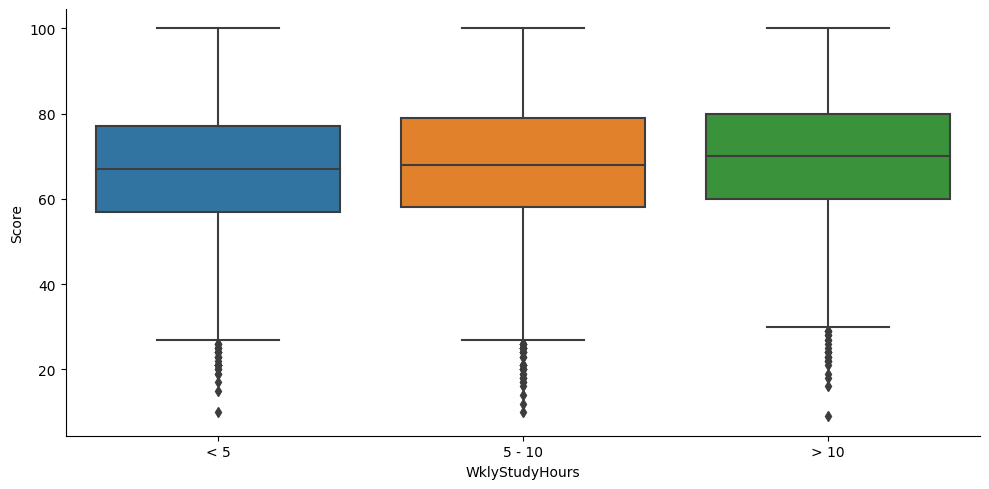

In [12]:
sns.catplot(data=df,x="WklyStudyHours",y="Score",kind="box",aspect=2)

Se puede observar que los promedios por cantidad de horas, estan mit parejos en lineas generales, pero cuanta mayor cantidad de horas estudian , se ve un leve aumento en los promedios 
de los examenes.
vamos a ver como se comporta en cada uno de los examenes por separado.

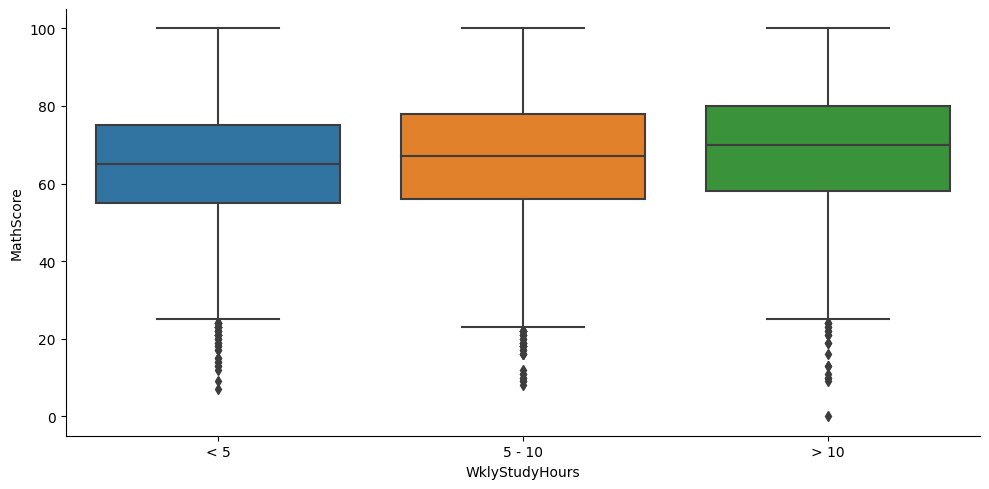

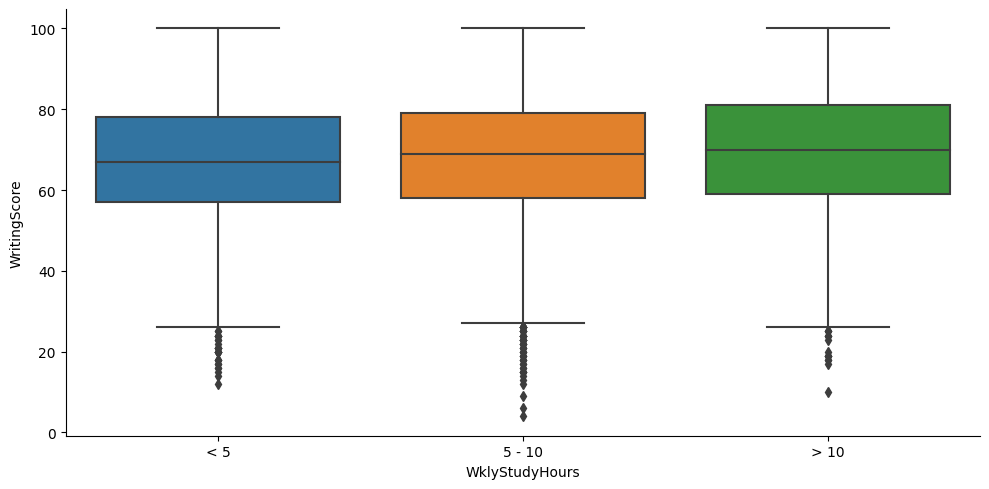

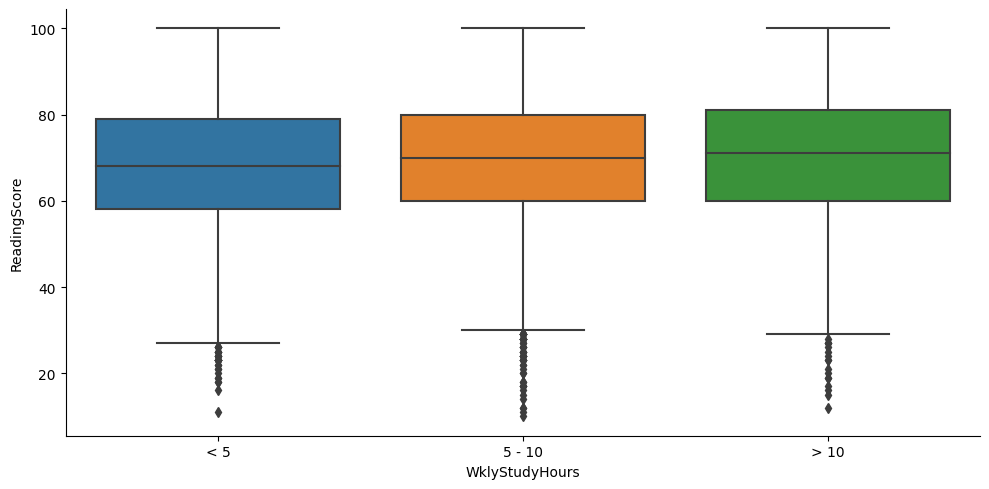

In [13]:
sns.catplot(data=df,x="WklyStudyHours",y="MathScore",kind="box",aspect=2)
sns.catplot(data=df,x="WklyStudyHours",y="WritingScore",kind="box",aspect=2)
sns.catplot(data=df,x="WklyStudyHours",y="ReadingScore",kind="box",aspect=2)

Se puede ver claramente que en matematica la cantidad de horas de estudio tiene un mejor promedio, en lectura y escritura no se ve una diferencia tan marcada.

5. **PROMEDIOS DE LOS EXÁMENES, SEGÚN LA PRÁCTICA DE DEPORTES**

vamos a ver como incide la practica de deportes en los promedios de los examenes. es nuestro principal objetivo para este proyecto. 
Nosotros pensamos que la actividad fisica es muy importante para el desarrollo y la salud de los alumnos. Vamos a ver este estudio como el mismo incidio en el resultado de los examenes.

<Axes: xlabel='PracticeSport', ylabel='Score'>

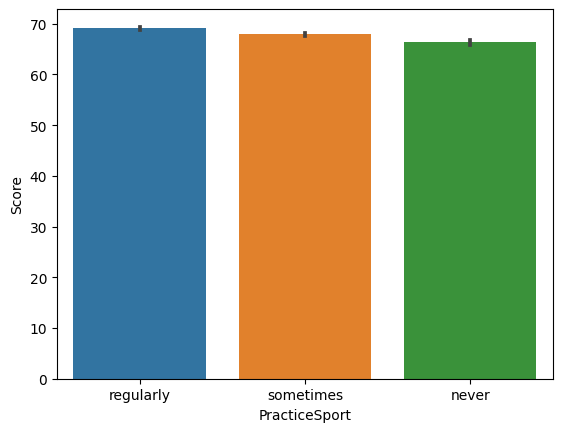

In [14]:
sns.barplot(data=df,x="PracticeSport",y="Score")

Se observa que los alumnos que practican deportes tienen un mejor promedio en los examenes que los alumnos que no practican deportes. 
Ahora vamos a ver como se comporta en cada uno de los examenes por separado para ver si se mantiene la tendencia.  

<Axes: xlabel='PracticeSport', ylabel='MathScore'>

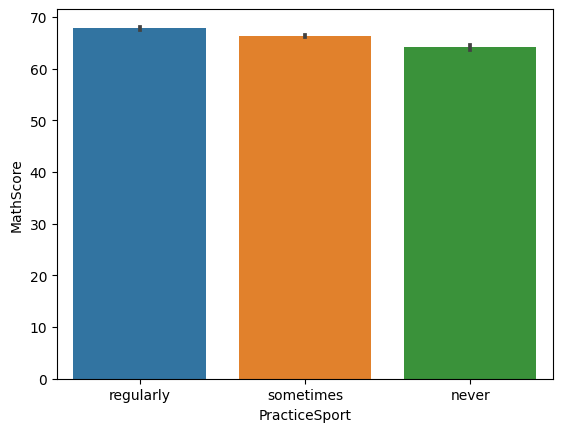

In [15]:
sns.barplot(data=df,x="PracticeSport",y="MathScore")

En matematicas se observa resultados muy similares entre los alumnos que practican deportes y los que no practican deportes que el promedio de los 3 examenes.

<Axes: xlabel='PracticeSport', ylabel='ReadingScore'>

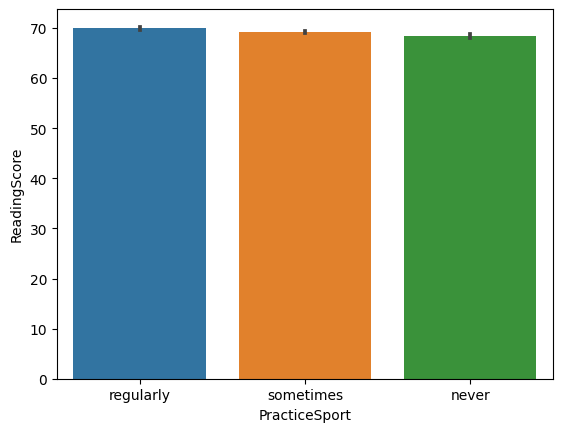

In [16]:
sns.barplot(data=df,x="PracticeSport",y="ReadingScore")

<Axes: xlabel='PracticeSport', ylabel='WritingScore'>

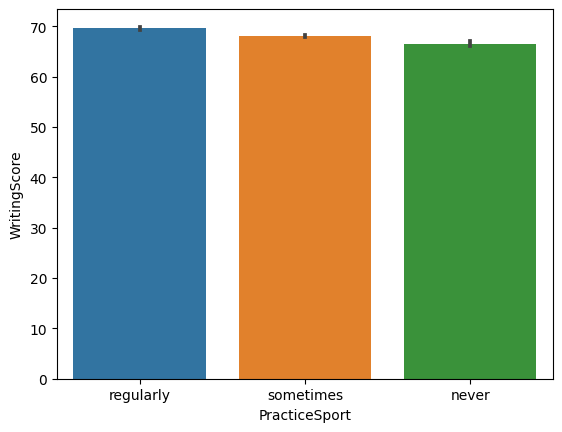

In [17]:
sns.barplot(data=df,x="PracticeSport",y="WritingScore")

Se puede ver que en matematicas y escritura los alumnos que practican deportes tienen un mejor promedio que los alumnos que no practican deportes. en lectura no se ve una diferencia 
tan marcada.

**CONCLUSIONES:**

En este estudiuo se analizo varios aspectos de como incide en los scores de los examenes de los alumnos, como el genero , el nivel de educacion de los padres , la cantidad de horas de 
estudio y la practica de deportes.
con respecto al genero se observa que las mujeres tienen un mejor promedio que los hombres en escritura y en lectura, pero en matematicas los hombres tienen un mejor promedio que las 
mujeres, esto no quiere decir que el universo de todos examenes se comporte de esta manera.
con respecto al nivel de educacion de los padres, se observa que los alumnos que tienen padres con un nivel de educacion de bachillerato y superior tienen mejores resultados en los 
examenes que los alumnos que tienen padres con un nivel de educacion de secundaria y primaria, pero los resultados son muy parejos en lineas generales.
La cantidad horas de estudios, si me causo una sorpresa con respecto a lo que tenia pensado, ya que el mismo no incide tanto en los resultados, donde mas incide , que es bastante 
logico es en matematicas.
La practica de deportes, si incide en los resultados de los examenes, los alumnos que practican deportes tienen un mejor promedio en los examenes que los alumnos que no practican 
deportes en lineas generale, pero se observa una mayor incidencia en matematicas y escritura que en lectura.